In [1]:
import os
import pickle
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from tqdm.notebook import tqdm
from functions import dirs, regression, readSet, corrMatrix
tqdm.pandas()

In [2]:
datasets = dirs('./data')
#datasets = ['AirlineTweets']
#datasets = ['Sentiment140']

In [3]:
picked = list(readSet('./data/Dimensions-Picked-Final.txt'))

Datasets:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11541 [00:00<?, ?it/s]

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                11541
Model:                          Logit   Df Residuals:                    11519
Method:                           MLE   Df Model:                           21
Date:                Thu, 29 Apr 2021   Pseudo R-squ.:                  0.1124
Time:                        21:47:04   Log-Likelihood:                -5003.9
converged:                       True   LL-Null:                       -5637.8
Covariance Type:                  HC3   LLR p-value:                1.872e-255
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 1.3050      0.491      2.656      0.008       0.342       2.268
nrConjunctions/nrWords               -0.1321      0.402     -0

  0%|          | 0/50000 [00:00<?, ?it/s]

C:\Libraries\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Libraries\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49978
Method:                           MLE   Df Model:                           21
Date:                Thu, 29 Apr 2021   Pseudo R-squ.:                 0.05335
Time:                        21:47:07   Log-Likelihood:                -32267.
converged:                       True   LL-Null:                       -34085.
Covariance Type:                  HC3   LLR p-value:                     0.000
                      

  0%|          | 0/1600000 [00:00<?, ?it/s]

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:              1600000
Model:                          Logit   Df Residuals:                  1599978
Method:                           MLE   Df Model:                           21
Date:                Thu, 29 Apr 2021   Pseudo R-squ.:                 0.01290
Time:                        21:48:05   Log-Likelihood:            -9.8644e+05
converged:                       True   LL-Null:                   -9.9933e+05
Covariance Type:                  HC3   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.6792      0.025     26.924      0.000       0.630       0.729
nrConjunctions/nrWords               -0.2246      0.024     -9

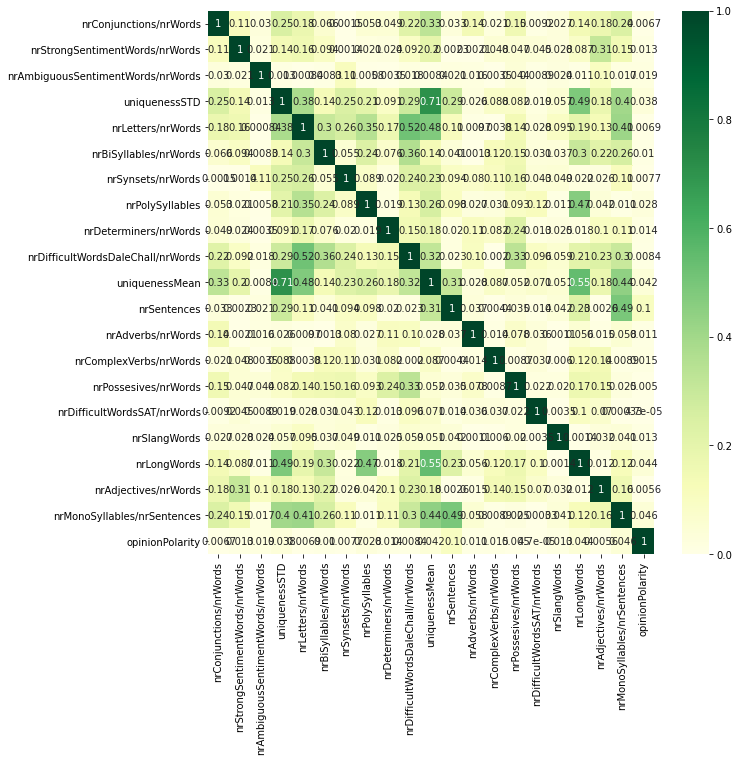

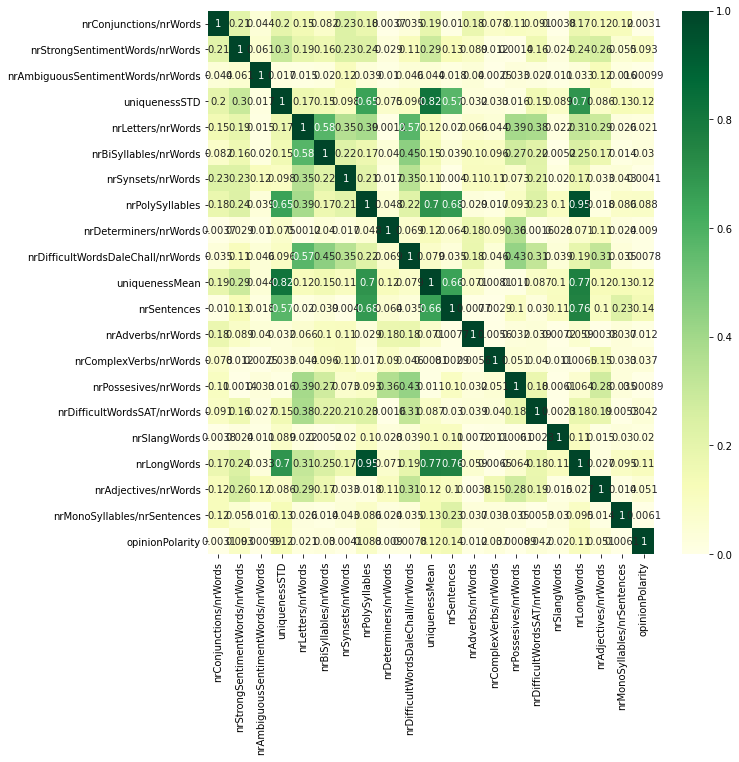

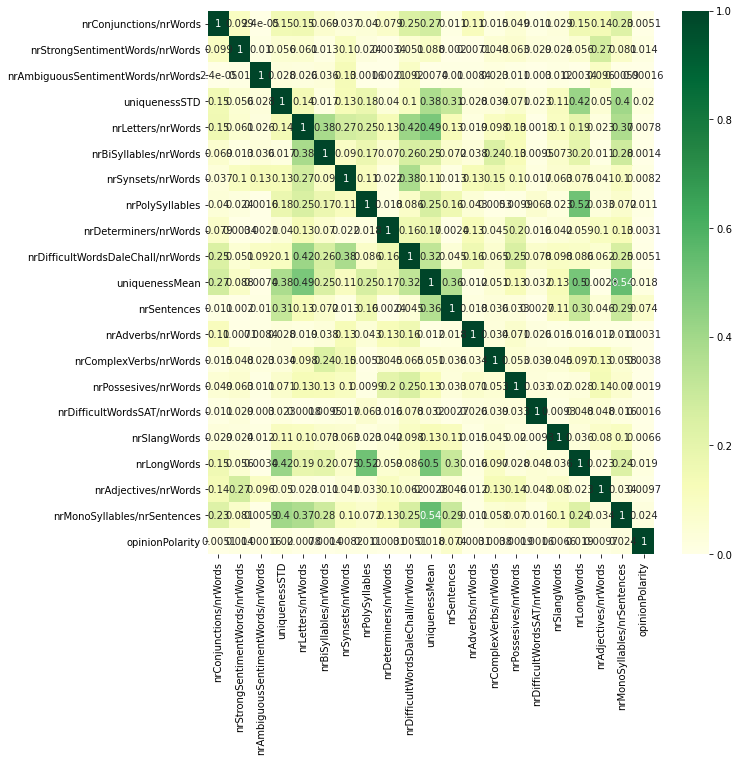

In [4]:
for dataset in tqdm(datasets, desc="Datasets"):
    outputFile = f'./data/{dataset}/Regression.pickle'
    corrMatrixFile = f'./data/{dataset}/Corrmatrix.png'

    dims = pd.read_csv(f'./data/{dataset}/Dimensions.csv')
    prediction = pd.read_csv(f'./data/{dataset}/Word2Vec-Prediction.csv')

    fig = corrMatrix(dims[picked]).get_figure()
    fig.patch.set_alpha(1)
    fig.savefig(corrMatrixFile)

    y = prediction.progress_apply(lambda row: 1 if row['truth'] == row['predicted'] else 0, axis=1)
    X = dims[picked]
    
    result = regression(y, X)
    print(result.summary())
    pickle.dump(result, open(outputFile, mode='wb'))